## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>

In [ ]:
# Load library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load data menjadi data frame
data = pd.read_csv('heart_failure_clinical_records_dataset_missing_new.csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1,2.0,3,4.0,5,6.00,7.0,8,9,10.0,11,12
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,0,61.0,1,38.0,1,155000.00,1.1,143,1,NaN,270,0
296,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139,0,0.0,271,0
297,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138,0,0.0,278,0
298,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140,1,1.0,280,0


In [ ]:
data.columns =['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']



In [ ]:
data = data.iloc[1:]
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
5,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1


In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
5,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,0,61.0,1,38.0,1,155000.00,1.1,143,1,NaN,270,0
296,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139,0,0.0,271,0
297,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138,0,0.0,278,0
298,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140,1,1.0,280,0


In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
5,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,269.000000,299.000000,284.000000,299.000000,296.000000,299.000000,269.000000,299.00000,299.000000,299.000000,275.000000,299.000000,299.00000
mean,61.057004,0.431438,570.947183,0.418060,38.064189,0.351171,261182.344796,1.39388,136.625418,0.648829,0.323636,130.260870,0.32107
std,12.096525,0.496107,973.348989,0.494067,11.778720,0.478136,98953.721912,1.03451,4.412477,0.478136,0.468716,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211000.000000,0.90000,134.000000,0.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,247.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.40000,140.000000,1.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.000000,285.000000,1.00000


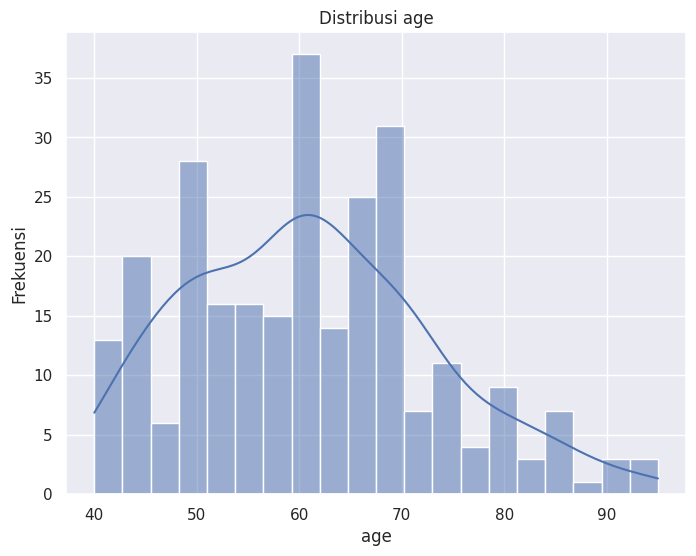

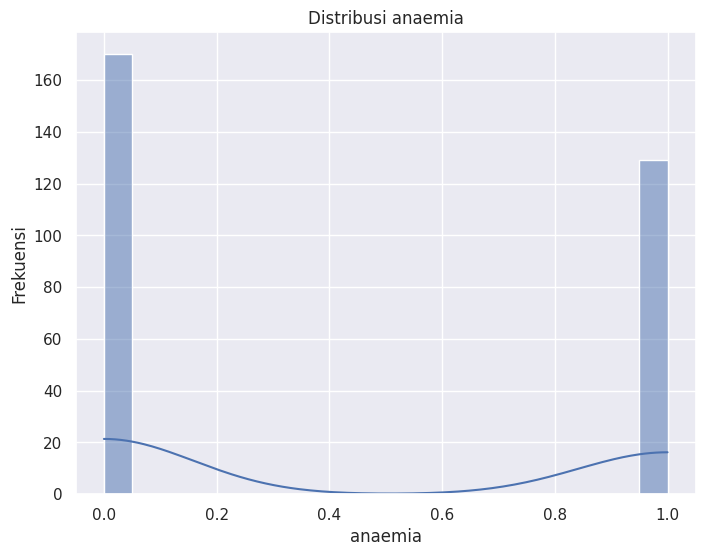

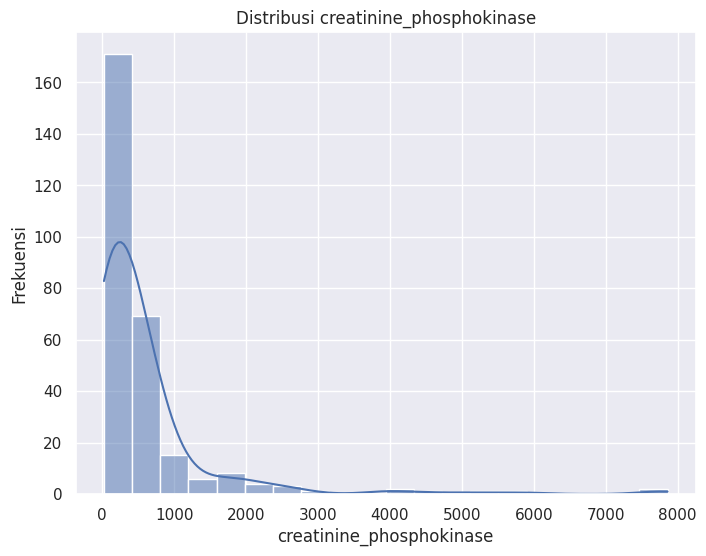

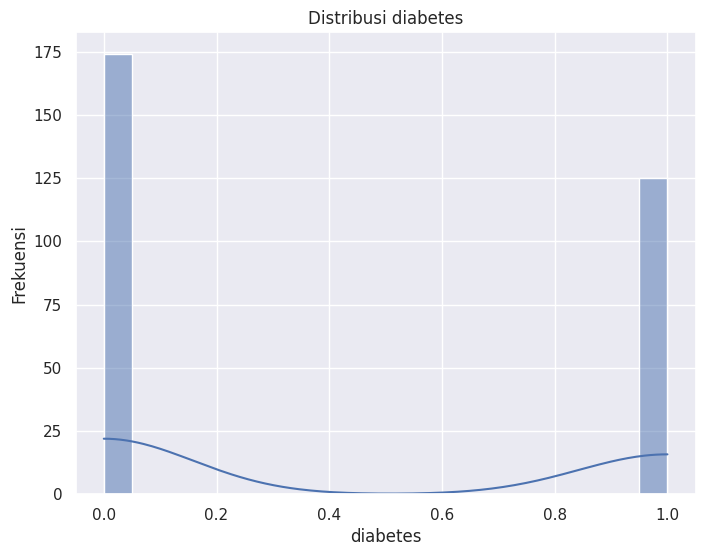

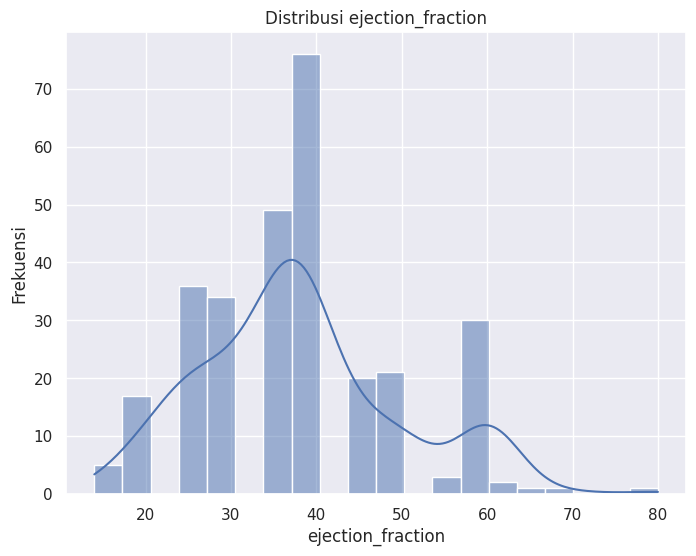

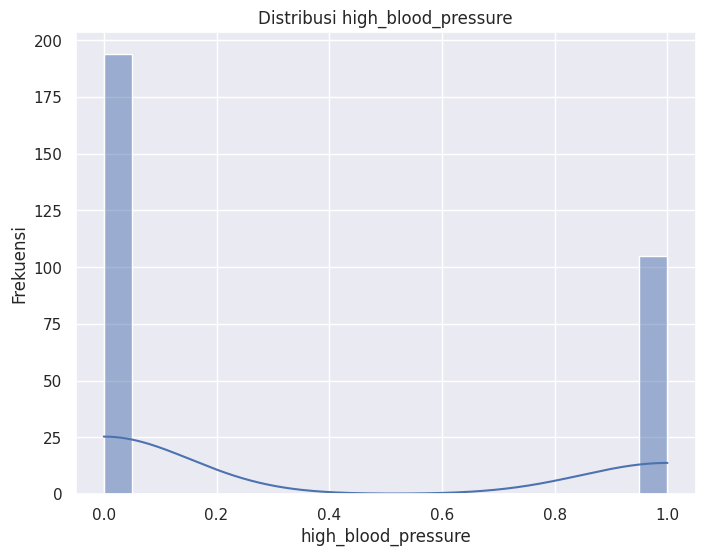

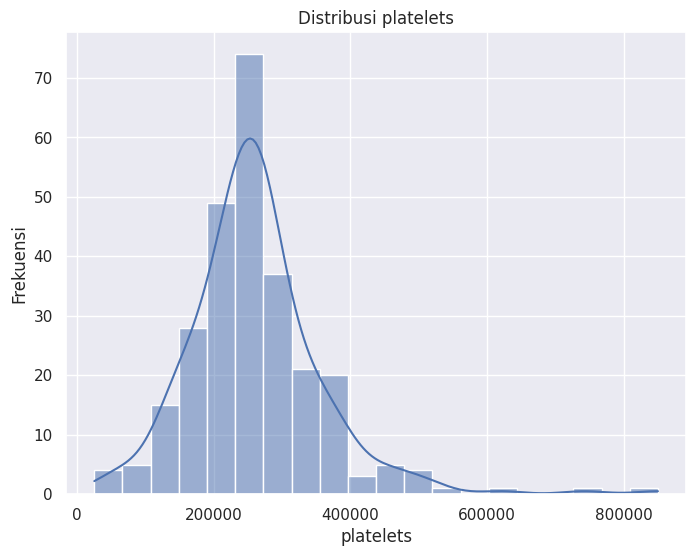

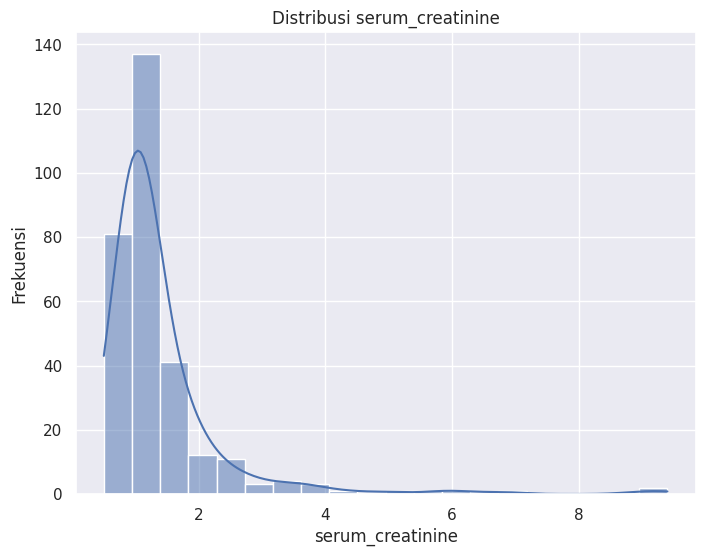

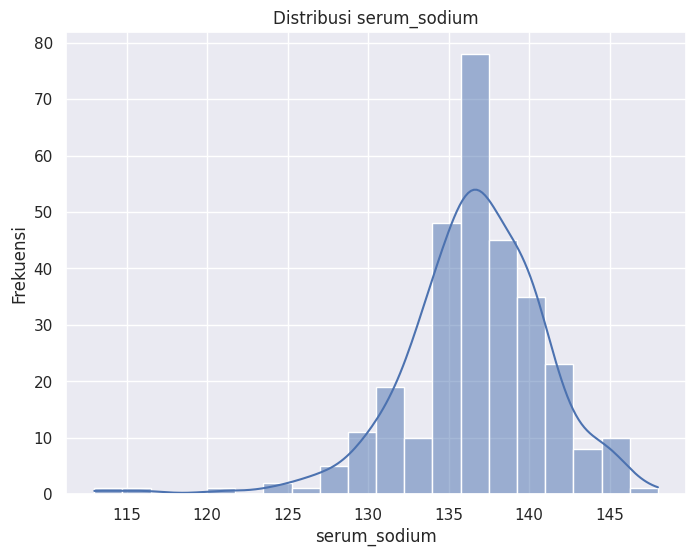

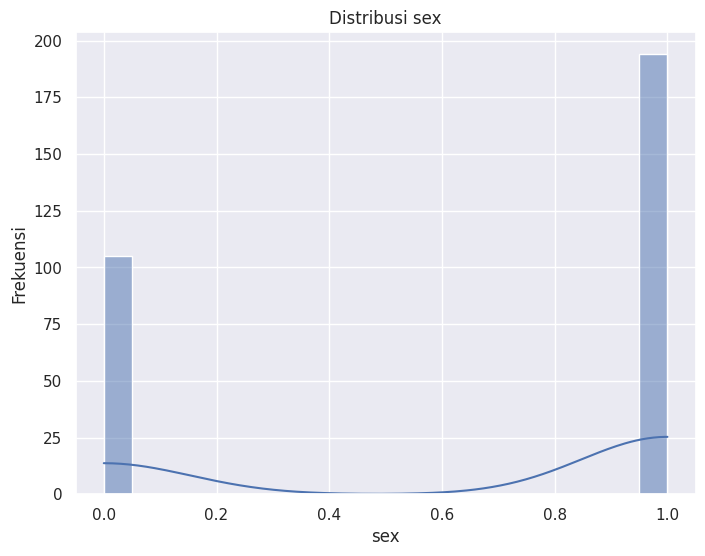

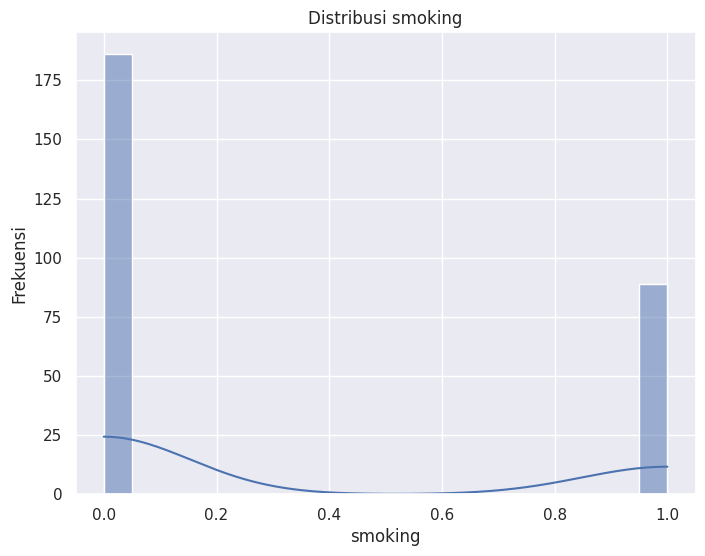

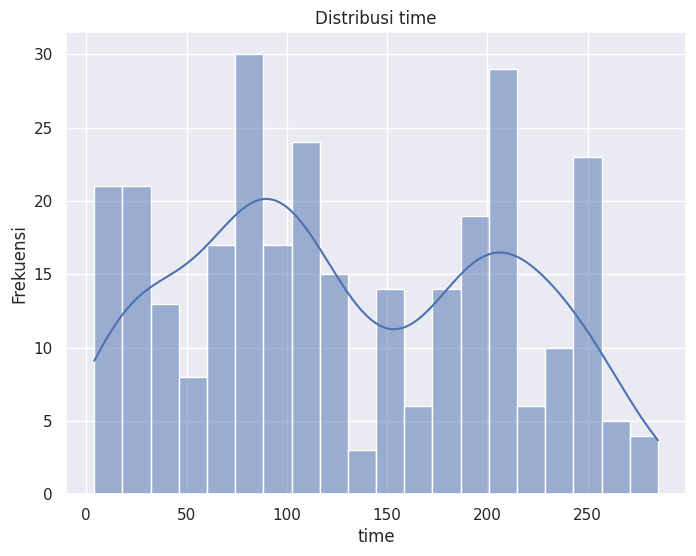

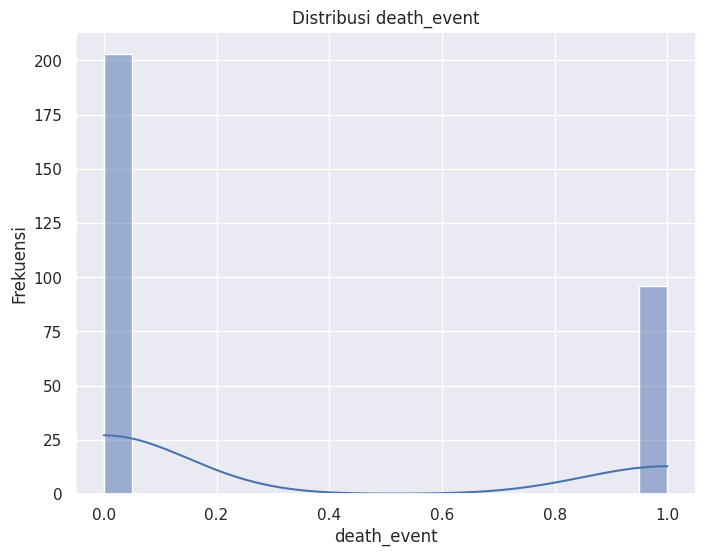

In [ ]:
# Loop melalui setiap kolom numerik dalam dataset
for column in data.select_dtypes(include=['number']).columns:
    # Buat histogram
    plt.figure(figsize=(8, 6))  # Atur ukuran figure
    sns.histplot(data[column], bins=20, kde=True)  # kde=True menambahkan kurva kepadatan
    plt.title(f'Distribusi {column}')  # Tambahkan judul
    plt.xlabel(column)  # Tambahkan label sumbu x
    plt.ylabel('Frekuensi')  # Tambahkan label sumbu y
    plt.show()  # Tampilkan histogram

Membersihkan Data


In [ ]:
for kolom in data.columns:
    nilai_unik = data[kolom].unique()
    print(f"Nilai unik untuk kolom '{kolom}': {nilai_unik}")

Nilai unik untuk kolom 'age': [75.    55.    65.    50.    90.    60.       nan 80.    62.    45.
 49.    82.    87.    70.    48.    68.    53.    95.    58.    94.
 85.    69.    72.    51.    57.    41.    42.    67.    79.    59.
 44.    63.    86.    43.    46.    61.    81.    52.    64.    40.
 60.667 77.    78.    54.    73.    47.    56.   ]
Nilai unik untuk kolom 'anaemia': [0 1]
Nilai unik untuk kolom 'creatinine_phosphokinase': [ 582. 7861.  146.  111.  160.   47.  246.   nan  157.  123.   81.  231.
  981.  168.   80.  379.  149.  125.   52.  128.   63.  148.  112.  122.
   60.   70.   23.  249.  159.   94.  855. 2656.  235.  124.  571.  127.
  588. 1380.  553.  129.  577.   91. 3964.   69.  260.  371.   75.  789.
  364. 7702.  318.  109.   68.  110.  161.  113. 5882.  224.   92.  102.
  203.  336.   76.   55.  280.   78.   84.  115.   66.  897.  154.  144.
  133.  514.   59.  156.   61.  305.  898. 5209.   53.  328. 1876.  936.
  292.  369.  143.  754.  400.   96.  737.  3

In [ ]:
# menghitung nilai Null pada dataset
data.isnull().sum()

,0
age,30
anaemia,0
creatinine_phosphokinase,15
diabetes,0
ejection_fraction,3
high_blood_pressure,0
platelets,30
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Jumlah observasi: 299
Jumlah variabel: 13
Kolom kategorikal: 6
Kolom Numerik: 7
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 6


In [ ]:
# mendeteksi keberadaan nilai Null
data.loc[:, data.isnull().any()].columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'smoking'],
      dtype='object')

In [ ]:
median_value=data['age'].median()
data['age']=data['age'].fillna(median_value)

median_value=data['creatinine_phosphokinase'].median()
data['creatinine_phosphokinase']=data['creatinine_phosphokinase'].fillna(median_value)

median_value=data['ejection_fraction'].median()
data['ejection_fraction']=data['ejection_fraction'].fillna(median_value)

median_value=data['platelets'].median()
data['platelets']=data['platelets'].fillna(median_value)

median_value=data['smoking'].median()
data['smoking']=data['smoking'].fillna(median_value)

<ipython-input-220-5f857b95e3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=data['age'].fillna(median_value)
<ipython-input-220-5f857b95e3a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['creatinine_phosphokinase']=data['creatinine_phosphokinase'].fillna(median_value)
<ipython-input-220-5f857b95e3a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
# menghitung nilai Null pada dataset
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
for kolom in data.columns:
    nilai_unik = data[kolom].unique()
    print(f"Nilai unik untuk kolom '{kolom}': {nilai_unik}")

Nilai unik untuk kolom 'age': [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    41.    42.    67.    79.    59.    44.
 63.    86.    43.    46.    61.    81.    52.    64.    40.    60.667
 77.    78.    54.    73.    47.    56.   ]
Nilai unik untuk kolom 'anaemia': [0 1]
Nilai unik untuk kolom 'creatinine_phosphokinase': [ 582. 7861.  146.  111.  160.   47.  246.  247.  157.  123.   81.  231.
  981.  168.   80.  379.  149.  125.   52.  128.   63.  148.  112.  122.
   60.   70.   23.  249.  159.   94.  855. 2656.  235.  124.  571.  127.
  588. 1380.  553.  129.  577.   91. 3964.   69.  260.  371.   75.  789.
  364. 7702.  318.  109.   68.  110.  161.  113. 5882.  224.   92.  102.
  203.  336.   76.   55.  280.   78.   84.  115.   66.  897.  154.  144.
  133.  514.   59.  156.   61.  305.  898. 5209.   53.  328. 1876.  936.
  292.  369.  143.  754.  400.   96.  737.  358. 

In [ ]:
for kolom in data.columns:
    nilai_unik = data[kolom].unique()
    print(f"Nilai unik untuk kolom '{kolom}': {nilai_unik}")

Nilai unik untuk kolom 'age': [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    41.    42.    67.    79.    59.    44.
 63.    86.    43.    46.    61.    81.    52.    64.    40.    60.667
 77.    78.    54.    73.    47.    56.   ]
Nilai unik untuk kolom 'anaemia': [0 1]
Nilai unik untuk kolom 'creatinine_phosphokinase': [ 582. 7861.  146.  111.  160.   47.  246.  247.  157.  123.   81.  231.
  981.  168.   80.  379.  149.  125.   52.  128.   63.  148.  112.  122.
   60.   70.   23.  249.  159.   94.  855. 2656.  235.  124.  571.  127.
  588. 1380.  553.  129.  577.   91. 3964.   69.  260.  371.   75.  789.
  364. 7702.  318.  109.   68.  110.  161.  113. 5882.  224.   92.  102.
  203.  336.   76.   55.  280.   78.   84.  115.   66.  897.  154.  144.
  133.  514.   59.  156.   61.  305.  898. 5209.   53.  328. 1876.  936.
  292.  369.  143.  754.  400.   96.  737.  358. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [ ]:
data = data.drop_duplicates()
duplicate_rows = data.duplicated()
print("Semua Data Duplikat:")
data[data.duplicated(keep=False)]  # Harusnya tidak ada output jika semua duplikat telah dihapus

Semua Data Duplikat:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event


## 6) Menkonstruksi Data <a class="anchor" id="h2"></a>

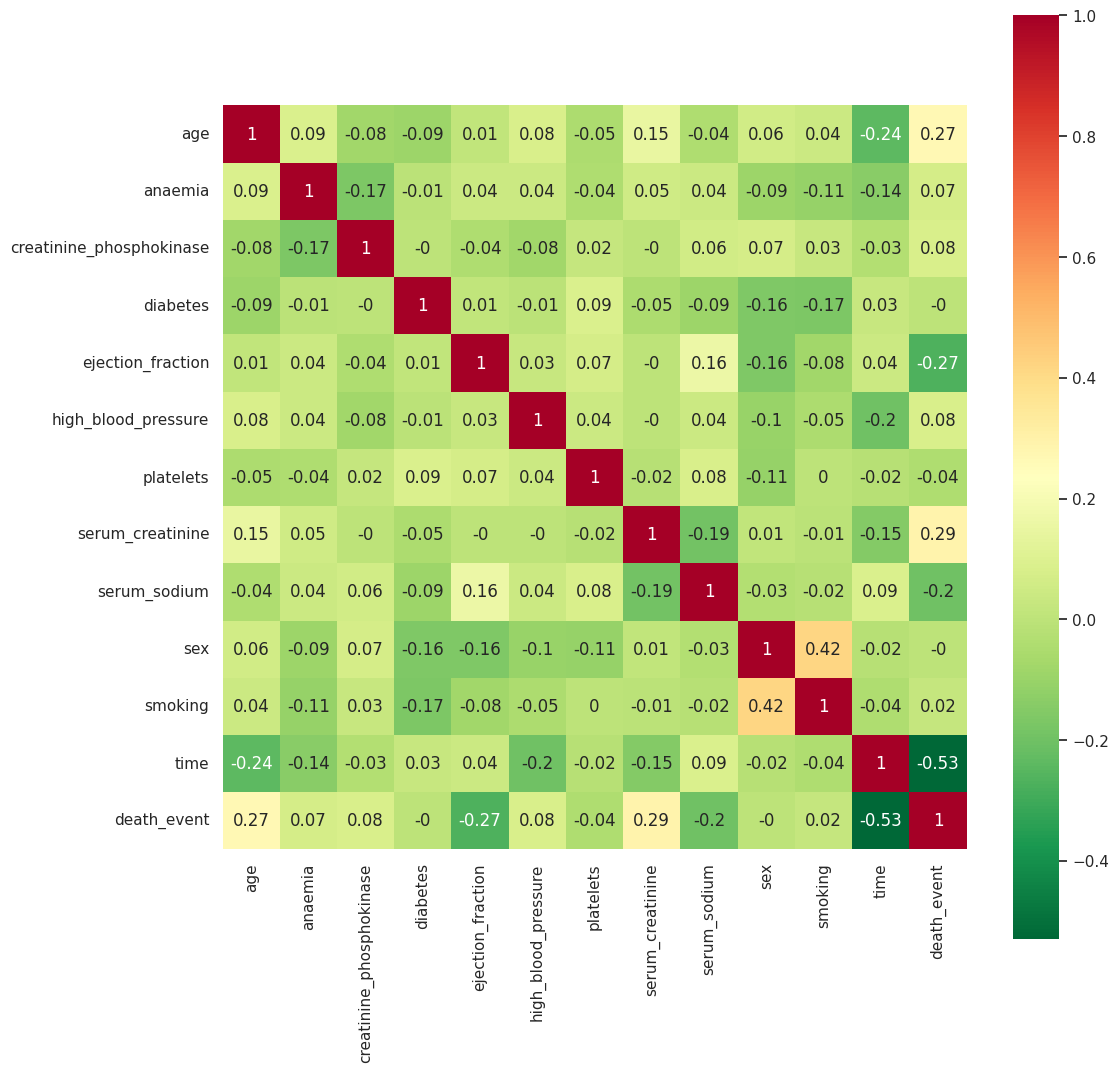

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation = data.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## 7) Menentukan Label <a class="anchor" id="h7"></a>

In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data.drop("death_event", axis = 1)
y = data["death_event"]

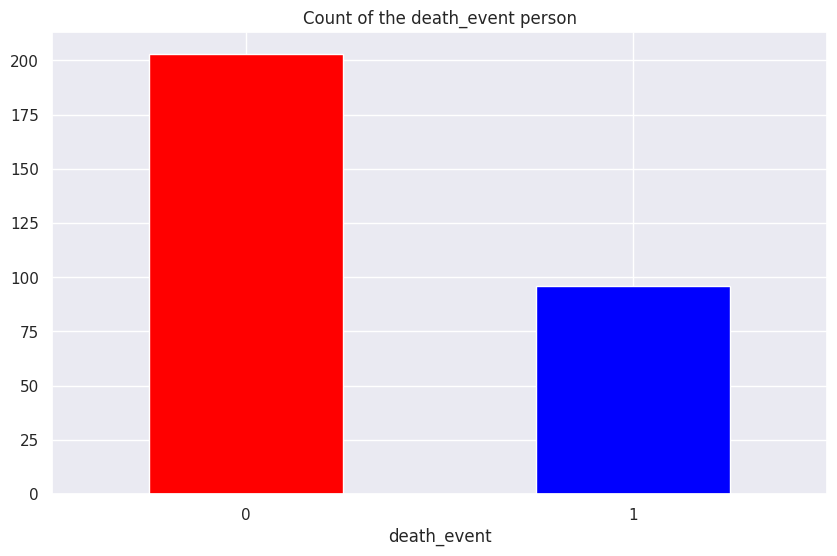

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data['death_event'].value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.title("Count of the death_event person")
plt.xticks(rotation=0);

In [ ]:
smote = SMOTE(random_state=42) # Inisialisasi SMOTE
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y) # Mengaplikasikan oversampling pada dataset

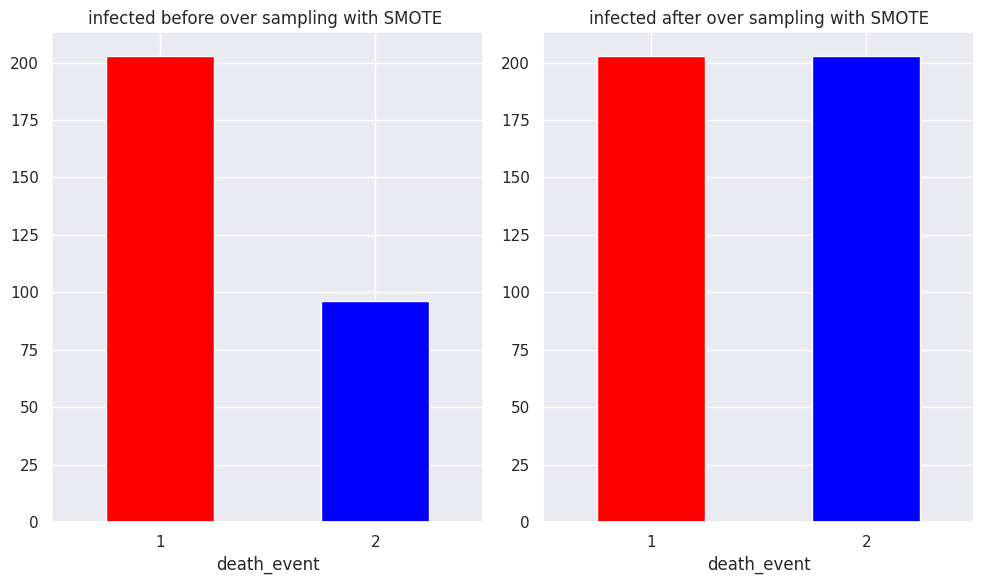

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);

# Menghilangkan koma pada sumbu x
xticks = [0, 1]  # Indeks kategori, bukan nilai
xticklabels = ['1', '2']
plt.xticks(xticks, xticklabels, rotation=0)  # rotation=0 untuk label horizontal


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

# Menghilangkan koma pada sumbu x
xticks = [0, 1]  # Indeks kategori, bukan nilai
xticklabels = ['1', '2']
plt.xticks(xticks, xticklabels, rotation=0)  # rotation=0 untuk label horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

In [ ]:
from sklearn.model_selection import train_test_split # Library untuk membantu memisahkan data menjadi dataset latih dan dataset validasi
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled) # 80% data latih, 20% data test

## 8) Model <a class="anchor" id="h7"></a>
Gunakan sebuah model klaisifikasi sebagai algoritma yang disarankan untuk pelatihan!

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

classifier_models = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn
}

In [ ]:
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, rf_y_pred), 3)

print(confusion_matrix(y_test, rf_y_pred))

print(classification_report(y_test, rf_y_pred))

[[37  4]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.90      0.90      0.90        41

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



In [ ]:
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, dt_y_pred), 3)

print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

# Evaluasi skor akurasi, confusion matrix, dan classification report dari decision tree
dt_acc = accuracy_score(y_test, dt.predict(X_test))
decision_tree_cm = confusion_matrix(y_test, dt.predict(X_test))

print(f"Training Accuracy Of Decision Tree Classifier is {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dt_acc} \n")

[[38  3]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.92      0.80      0.86        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82

Training Accuracy Of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8658536585365854 



In [ ]:
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, knn_y_pred), 3)

print(confusion_matrix(y_test, knn_y_pred))

print(classification_report(y_test, knn_y_pred))

# Evaluasi skor akurasi, confusion matrix, dan classification report dari knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

[[24 17]
 [11 30]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.63        41
           1       0.64      0.73      0.68        41

    accuracy                           0.66        82
   macro avg       0.66      0.66      0.66        82
weighted avg       0.66      0.66      0.66        82

Training Accuracy of KNN is 0.7067901234567902
Test Accuracy of KNN is 0.6585365853658537 



## 9) Perbandingan <a class="anchor" id="h9"></a>
Evaluasi performa model yang telah kamu latih!

<ipython-input-236-879a5e674ec7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


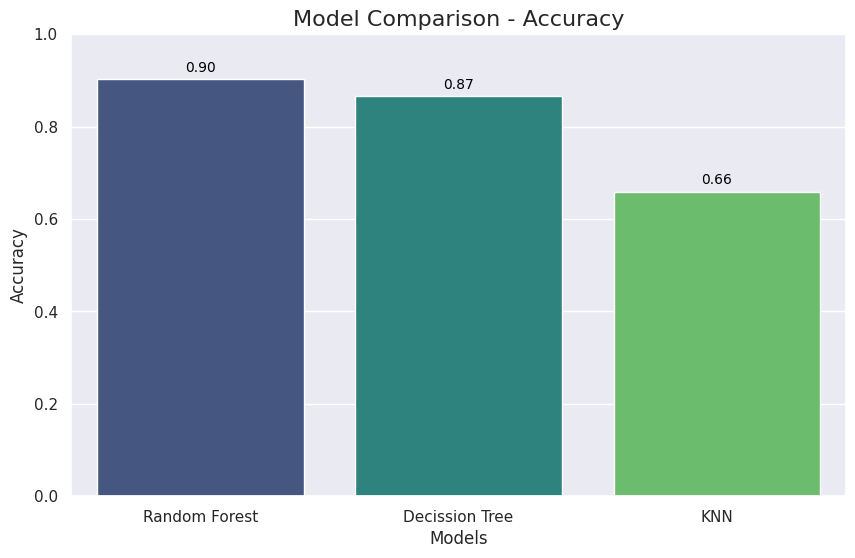

In [ ]:
# Evaluasi disini
models = ['Random Forest', 'Decission Tree', 'KNN']
accuracies = [
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, knn_y_pred)
]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()